# Introduction to Text as Data

**Author**: June Yang, CSDE and eScience Institute 

**Date**: Sep 2024

Welcome to this workshop on **Text as Data**! In this session, we'll explore key concepts from four critical areas:

1. **Resources and Materials**
1. **Retrieving Text Data Using APIs**
2. **Selection and Representation**
3. **Discovery**
4. **Measurement**

Each section will provide a general overview and hands-on Python examples to solidify your understanding. Note that this is a practical workshop, so we're not going deep into the theoretical details, principles, biases, and ethical considerations of working with text data. This does not mean however that we do not care about these aspects. In fact, thinking about biases and ethical issues is **crucial** when working with text data. I encourage you check out the materials listed below, for detailed discussions on topics that are not covered in this workshop. 

---

## Table of Contents

1. [Resources and Materials](#Resources-and-Materials)
2. [Retrieving Text Data Using APIs](#Retrieving-Text-Data-Using-APIs)
    - [Overview](#Overview)
    - [Understanding APIs](#Understanding-APIs)
    - [Accessing APIs in Python](#Accessing-APIs-in-Python)
    - [Coding Example](#Coding-Example)
3. [Selection and Representation](#Selection-and-Representation)
    - [Overview](#Overview-1)
    - [Understanding Text Data](#Understanding-Text-Data)
    - [Data Selection](#Data-Selection)
    - [Text Preprocessing](#Text-Preprocessing)
    - [Feature Representation](#Feature-Representation)
    - [Coding Example](#Coding-Example-1)
4. [Discovery](#Discovery)
    - [Overview](#Overview-2)
    - [Unsupervised Learning](#Unsupervised-Learning)
    - [Topic Modeling](#Topic-Modeling)
    - [Clustering](#Clustering)
    - [Coding Example](#Coding-Example-2)
5. [Measurement](#Measurement)
    - [Overview](#Overview-3)
    - [Sentiment Analysis](#Sentiment-Analysis)
    - [Readability Scores](#Readability-Scores)
    - [Content Analysis](#Content-Analysis)
    - [Coding Example](#Coding-Example-3)
6. [Conclusion](#Conclusion)
7. [Additional Resources](#Additional-Resources)

---

## Resources and Materials

In the age of information, text data is abundant—from social media posts and news articles to academic papers and policy documents. Understanding how to retrieve, process, and analyze this unstructured data is crucial for insights in machine learning and social sciences.

This tutorial is based on Python 3.8 and the following libraries:
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/getting_started/install.html)
- [NumPy](https://numpy.org/install/)
- [Scikit-learn](https://scikit-learn.org/stable/install.html)
- [NLTK](https://www.nltk.org/install.html)
- [Gensim](https://radimrehurek.com/gensim/install.html)
- [requests](https://requests.readthedocs.io/en/latest/user/install/#install)
- [json](https://docs.python.org/3/library/json.html)
- [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/#installing-beautiful-soup)
- [spaCy](https://spacy.io/usage)
- [NLTK](https://www.nltk.org/install.html)
- [matplotlib](https://matplotlib.org/stable/users/installing/index.html)

Specific use of the packages will be introduced below. 

This tutorial is based on the following books and resources:

- Main book this tutorial based on:
  
  <img src="https://pup-assets.imgix.net/onix/images/9780691207551.jpg" alt="Text as Data: A New Framework for Machine Learning and the Social Sciences" width="300">
- Useful guidance on NLP pipeline, including Python tutorials and Github Repo:
  
  <img src="https://learning.oreilly.com/library/cover/9781492054047/250w/" alt="Text as Data: A Practical Introduction in Python" width="300">
  
- [The Summer Institute in Computational Social Science Learning Materials](https://sicss.io/curriculum)

Full references and additional resources could be found in the [References](#References) at the bottom of this tutorial.

---

## Appendix: Retrieving Text Data Using APIs

### Overview

Before we can analyze text data, we need to **retrieve** it. One common way to collect text data is through **Application Programming Interfaces (APIs)**. APIs allow you to programmatically access data from various platforms and services.

Key concepts:

- **Understanding APIs**: What they are and how they work.
- **Accessing APIs in Python**: Using libraries to make API requests.
- **Handling API Data**: Processing and storing the retrieved data.

### Understanding APIs

**What is an API?**

- An **API (Application Programming Interface)** is a set of rules and protocols that allows different software applications to communicate with each other.
- APIs enable you to access data or functionality from another application or service.

**Why Use APIs for Text Data?**

- **Access Real-Time Data**: APIs can provide up-to-date information.
- **Automate Data Retrieval**: Programmatically collect data without manual intervention.
- **Customize Data Queries**: Fetch specific data relevant to your research.

**Common Text Data APIs**

- **News APIs**: Access news articles from various sources.
- **Social Media APIs**: Retrieve posts from platforms like Twitter, Reddit, or Facebook.
- **Open Data APIs**: Government or organizational data repositories.

### Accessing APIs in Python

**HTTP Requests**

- APIs often use HTTP requests to send and receive data.
- Common HTTP methods: `GET`, `POST`, `PUT`, `DELETE`.

**API Authentication**

- Some APIs require an **API key** or **OAuth** for authentication.
- Always keep your API keys secure and never share them publicly.

**Python Libraries for API Access**

- `requests`: A simple HTTP library for Python.
- `json`: To parse JSON responses.
- Specific libraries: Some APIs have dedicated Python wrappers (e.g., `tweepy` for Twitter).

---

### Coding Example

We'll walk through an example of accessing a News API to retrieve recent articles on a specific topic.

#### Import Libraries

In [2]:
import requests
import json
import pandas as pd

#### Setting Up API Access

**Choose an API**

For this example, we'll use the [NewsAPI](https://newsapi.org/), which allows us to access news articles from various sources.

**Sign Up and Get an API Key**

1. Visit [NewsAPI.org](https://newsapi.org/register).
2. Sign up for a free account.
3. Obtain your API key from the dashboard.

**Store Your API Key Securely**

In [3]:
# Store your API key as a string
api_key = 'YOUR_NEWSAPI_KEY_HERE'

> **Important**: Replace `'YOUR_NEWSAPI_KEY_HERE'` with your actual API key. Keep your API key private and do not share it.

#### Retrieving Data from an API

**Define the API Endpoint and Parameters**

In [4]:
# Define the endpoint
url = 'https://newsapi.org/v2/everything'

# Define the parameters
parameters = {
    'q': 'climate change',  # Search query
    'pageSize': 100,        # Number of results per page
    'apiKey': api_key       # Your API key
}

**Make the API Request**

In [5]:
# Make the request
response = requests.get(url, params=parameters)

# Check the status code
print(f"Status Code: {response.status_code}")

Status Code: 401


- **Status Code 200**: Success
- Other codes indicate issues (e.g., 401 Unauthorized, 429 Too Many Requests)

**Parse the JSON Response**

In [6]:
# Parse the JSON content
data = response.json()

# Check if there are articles
if data['status'] == 'ok':
    articles = data['articles']
    print(f"Number of articles retrieved: {len(articles)}")
else:
    print("Failed to retrieve articles")

Failed to retrieve articles


#### Processing and Saving the Data

**Extract Relevant Information**

In [7]:
# Create a list to store article information
article_list = []

for article in articles:
    article_info = {
        'source': article['source']['name'],
        'author': article['author'],
        'title': article['title'],
        'description': article['description'],
        'content': article['content'],
        'publishedAt': article['publishedAt'],
        'url': article['url']
    }
    article_list.append(article_info)

NameError: name 'articles' is not defined

**Create a DataFrame**

In [ ]:
# Convert the list to a DataFrame
df = pd.DataFrame(article_list)

# Display the first few entries
df.head()

**Handle Missing Data**

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Optionally, drop rows with missing content
df = df.dropna(subset=['content'])

**Save the Data**

In [ ]:
# Save to CSV
df.to_csv('news_articles.csv', index=False)

# Save to JSON
df.to_json('news_articles.json', orient='records', lines=True)

**Display Sample Articles**

In [ ]:
# Display titles and content
for index, row in df.iterrows():
    print(f"Article {index+1}: {row['title']}")
    print(f"Content: {row['content']}
")
    if index >= 2:  # Display only the first 3 articles
        break

---

### Exercise

**Try it yourself**:

1. **Change the Query**: Modify the search query to a topic of your interest (e.g., "artificial intelligence").
2. **Explore Other Parameters**: Adjust parameters like `from`, `to`, `language`, or `sources`.
   - Example: Add `'language': 'en'` to fetch only English articles.
3. **Handle Pagination**: Retrieve more articles by handling pagination.
   - Use the `page` parameter to navigate through pages.
4. **Rate Limiting**: Be mindful of the API's rate limits to avoid being blocked.

**Note**: Always refer to the API's documentation for available parameters and usage guidelines.

---

### Additional Example: Using Reddit API with `PRAW`

**Install and Import PRAW**

In [ ]:
# Install PRAW (Python Reddit API Wrapper)
!pip install praw

import praw

**Set Up Reddit API Access**

1. Create a Reddit account if you don't have one.
2. Go to [Reddit Apps](https://www.reddit.com/prefs/apps) to create an app.
3. Choose **script** and fill in the required details.
4. Obtain your `client_id`, `client_secret`, and `user_agent`.

**Initialize Reddit Instance**

In [ ]:
# Initialize Reddit instance
reddit = praw.Reddit(
    client_id='YOUR_CLIENT_ID',
    client_secret='YOUR_CLIENT_SECRET',
    user_agent='YOUR_USER_AGENT'
)

> **Important**: Replace `'YOUR_CLIENT_ID'`, `'YOUR_CLIENT_SECRET'`, and `'YOUR_USER_AGENT'` with your actual credentials.

**Retrieve Posts from a Subreddit**

In [ ]:
# Choose a subreddit
subreddit_name = 'datascience'

# Get the subreddit
subreddit = reddit.subreddit(subreddit_name)

# Fetch the top posts
top_posts = subreddit.top(limit=10)

# Store post information
posts = []

for post in top_posts:
    post_info = {
        'title': post.title,
        'author': str(post.author),
        'score': post.score,
        'url': post.url,
        'num_comments': post.num_comments,
        'created': post.created_utc,
        'selftext': post.selftext
    }
    posts.append(post_info)

# Convert to DataFrame
df_reddit = pd.DataFrame(posts)
df_reddit.head()

**Save the Data**

In [ ]:
# Save to CSV
df_reddit.to_csv('reddit_posts.csv', index=False)

---

## Selection and Representation

### Overview

The first step in the text analysis process often involves **choosing** the right text data and converting it into a **numerical** format that models can understand. Before we dive into the code, we need to start with basic principles and concepts of selecting and representing text data.

**Key Principles**
- **Principle 1**: Question-Specific Corpus Construction
- **Principle 2**: No Values-Free Corpus Construction
- **Principle 3**: No Right Way to Represent Text
- **Principle 4**: Validation

**Key concepts**

- **Data Selection**: Identifying and collecting relevant text data (corpora) for analysis.
- **Text Preprocessing**: Cleaning and preparing text data for analysis.
- **Feature Representation**: Converting text into numerical features that models can process.

---

### How to Select and Present Text Data Using Python?

We'll walk through an example using the `nltk`, `scikit-learn`, and `matplotlib` libraries to preprocess text data and represent it numerically.

#### Data Selection

Selecting the appropriate text data is the first step:

- **Define Objectives**: What are you trying to find out?
- **Source Data**: Collect data from reliable sources (e.g., news articles, social media).
- **Sampling**: Ensure your data is representative of the population you're studying.

What are the possible sources of bias you can think of in the process of selecting data?

In the example below, we will use the NLTK movie reviews corpus to study the sentiment of movie reviews.

##### Import Libraries

In [1]:
# Import necessary libraries
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Download NLTK data files (only need to run once)
nltk.download('punkt') # tokenizer  
nltk.download('stopwords') # stopwords
nltk.download('wordnet') # lemmatizer

# Import additional libraries
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to /Users/junheyang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/junheyang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/junheyang/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


##### Loading Data


In [2]:
# Download NLTK movie reviews corpus
nltk.download('movie_reviews')

from nltk.corpus import movie_reviews

[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/junheyang/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


We can examine the movie_reviews corpus by using the following methods. 

In [3]:
# movie_reviews.fileids()
# movie_reviews.categories()
# movie_reviews.words()
# nltk.FreqDist(movie_reviews.words())
nltk.FreqDist(movie_reviews.words())['happy']

215

We then make the movie reviews data into a dataframe. 

In [15]:
# Load movie reviews data
documents = [movie_reviews.raw(fileid) for fileid in movie_reviews.fileids()]
labels = [movie_reviews.categories(fileid)[0] for fileid in movie_reviews.fileids()]

# Create a DataFrame
df = pd.DataFrame({'Review': documents, 'Label': labels})

In [16]:
# Check the number of documents
print(f"Number of documents: {len(df)}")

# Display the first few reviews
df.head()

Number of documents: 2000


,Review,Label
0,"plot : two teen couples go to a church party ,...",neg
1,the happy bastard's quick movie review \ndamn ...,neg
2,it is movies like these that make a jaded movi...,neg
3,""" quest for camelot "" is warner bros . ' firs...",neg
4,synopsis : a mentally unstable man undergoing ...,neg


#### Text Preprocessing

Before diving into the analysis, it's essential to understand the nature of text data. As we could tell from the example, text data can be:

- **Unstructured**: Text is unstructured, making it challenging to process directly.
- **Variability**: Text can vary in length, style, and content.
- **Noise**: Text data often contains typos, slang, and irrelevant information.

Text preprocessing is crucial for cleaning and preparing your data. It usually involves the following steps:

- **Choose the unit of analysis**: We could choose the whole document as the unit of analysis, or choose sentences or paragraphs as the unit of analysis.
- **Tokenization**: Splitting text into words or sentences.
- **Reduce Complexity**:
  - Lowercase
  - Remove Punctuation
  - Remove Stop Words
  - Create Equivalences Classes (Lemmatize/Stem)
  - Filter by Frequency

##### Define Preprocessing Function

In [17]:
# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Tokenize
    tokens = word_tokenize(text)
    # Remove punctuation and non-alphabetic tokens
    tokens = [word for word in tokens if word.isalpha()]
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Rejoin tokens into a single string
    processed_text = ' '.join(tokens)
    return processed_text

Additional data processing steps often involves removing duplicates, and irrelevant documents, such as advertisements that commonly mingled in the social media data.

##### Apply Preprocessing

In [18]:
df['Processed_Review'] = df['Review'].apply(preprocess_text)
df.head()

,Review,Label,Processed_Review
0,"plot : two teen couples go to a church party ,...",neg,plot two teen couple go church party drink dri...
1,the happy bastard's quick movie review \ndamn ...,neg,happy bastard quick movie review damn bug got ...
2,it is movies like these that make a jaded movi...,neg,movie like make jaded movie viewer thankful in...
3,""" quest for camelot "" is warner bros . ' firs...",neg,quest camelot warner bros first attempt steal ...
4,synopsis : a mentally unstable man undergoing ...,neg,synopsis mentally unstable man undergoing psyc...


In [20]:
# deduplicate Processed_Review
df = df.drop_duplicates(subset=['Processed_Review'])

#### Feature Representation

Once the text is cleaned, we need to convert it into numerical features to come up with a **document-feature matrix**. A document-feature matrix is a matrix where each row represents a different document, and each column represents a different feature we use to represent the document. This throws away a lot of information - most notably word order - but provides the researcher with a parsimonious representation of the document that is useful for many purposes.

We start from the most basic feature representation:

- **Bag-of-Words (BoW)**: Represents text as the frequency of words.

##### Bag-of-Words Representation

The most common feature representation is the bag-of-words representation. It represents text as the frequency of words. We'll use the `CountVectorizer` function from `scikit-learn` to convert the text data into the bag-of-words representation.

In [22]:
# import CountVectorizer and TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

We first use `CountVectorizer` to create an instance of the CountVectorizer class. Then, using `fit_transform`, we have the vectorizer learns the vocabulary from the input texts(the `fit` part). It then creates a document-feature matrix where each row represents a document, and each column represents a feature (in this case, the number of times each word appears in the document), this is the `transform` part.

The result, `X_bow`, is a sparse matrix. It's called `Bag of Words` because it disregards grammer and word order, and only looks at the frequency of each word in each document.

In [24]:
# Initialize CountVectorizer
vectorizer = CountVectorizer() # creating the instance first will allow us to use the methods associated with the class
X_bow = vectorizer.fit_transform(df['Processed_Review'])

# Display feature names
print("Feature Names:")
print(vectorizer.get_feature_names_out())

# Display the Bag-of-Words representation
print("\nBag-of-Words Representation:")
print(X_bow.toarray())

Feature Names:
['aa' 'aaa' 'aaaaaaaaah' ... 'zwick' 'zwigoff' 'zycie']

Bag-of-Words Representation:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


We can also turn the bag-of-words sparse matrix into a dataframe to take a look at the representation more clearly. 

In [26]:
# Get feature names
feature_names = vectorizer.get_feature_names_out()

# Convert sparse matrix to dense array
bow_array = X_bow.toarray()

# Create a DataFrame
bow_df = pd.DataFrame(bow_array, columns=feature_names)

# Display the first few rows and columns
print("\nBag-of-Words Representation (first 5 documents, first 10 features):")
print(bow_df.iloc[:5, :10])  

# If you want to see all features for a specific document:
doc_index = 0  
print(f"\nAll features for document {doc_index}:")
print(bow_df.iloc[doc_index].loc[bow_df.iloc[doc_index] != 0].sort_values(ascending=False))


Bag-of-Words Representation (first 5 documents, first 10 features):
   aa  aaa  aaaaaaaaah  aaaaaaaahhhh  aaaaaah  aaaahhhs  aahs  aaliyah  \
0   0    0           0             0        0         0     0        0   
1   0    0           0             0        0         0     0        0   
2   0    0           0             0        0         0     0        0   
3   0    0           0             0        0         0     0        0   
4   0    0           0             0        0         0     0        0   

   aalyah  aamir  
0       0      0  
1       0      0  
2       0      0  
3       0      0  
4       0      0  

All features for document 0:
film          8
movie         7
make          6
pretty        5
teen          4
             ..
generation    1
genre         1
girlfriend    1
give          1
year          1
Name: 0, Length: 236, dtype: int64


In [27]:
# Display the 50 most frequent words
word_freq = bow_df.sum().sort_values(ascending=False)
print("\n50 Most Frequent Words:")
print(word_freq.head(50))


50 Most Frequent Words:
film           10951
movie           6858
one             5753
character       3851
like            3638
time            2845
get             2784
scene           2641
make            2579
even            2553
good            2328
story           2318
would           2259
much            2022
also            1964
see             1863
way             1853
two             1827
life            1808
first           1768
go              1725
well            1670
thing           1648
could           1608
year            1562
take            1556
really          1554
plot            1504
come            1501
little          1491
know            1483
people          1460
bad             1371
work            1361
never           1359
man             1348
performance     1315
best            1301
end             1299
new             1274
look            1272
many            1268
actor           1226
director        1212
play            1197
love            1183
action   

Building off from the Bag of Words representation, there are two fundamental types of models we could consider: *probabblistic* and *algorithmic*. 

In probablistic models, we make assumptions about the data generation process using probability. This data generation process is based on an unkown set of parameters. Our job is to estimate these parameters using the data we actually observe. Understanding probabilistic models forms the foundation of the probablistic clustering, admixture, and classification models. 

In algorithmic approaches, instead of making assumptions about the data generation process, we start by specifying a series of steps, usually in the form of an objective function to optimize. In the context of text representation, we can use the *vector space model* to represent documents as vectors in a high-dimensional space, where each dimension corresponds to a feature. This will allow us to use measures of similarity and distances drawn from linear algebra to compare documents. 

In essence, both approaches can be thought of as using different languages to describe the same thing. Consider, for example, describing linear regression from a probabilistic perspective (a normal linear model) vs. an algorithmic perspective (least squares estimation). 

In this tutorial, we will focus on a common approach to reweight the terms when constructing the vector space:
- **Term Frequency-Inverse Document Frequency (TF-IDF)**: Weighs words based on their importance.

##### TF-IDF Representation

High frequent words are essentially the glue that holds language together, and they offer few clues about what the text as about. Rare words on the other hand might contain a lot more useful information, but they are not frequent enough to be useful for making generalizations about the text. The key is the words in the middle. 

Term Frequency Inverse Document Frequency (TF-IDF) is a measure that reflects how important a word is to a document in a corpus. After computing the document-feature matrix, tf-idf scales each term bount by a measure of its inverse frequency within the whole corpus. This has the effect of down-weighting frequent words. The most common form of tf-idf takes the form of 

$$\text{TF-IDF}(t,d,D) = \text{TF}(t,d) \cdot \text{IDF}(t,D)$$

Where:

$$\text{TF}(t,d) = \frac{n_{t,d}}{N_d}$$

$$\text{IDF}(t,D) = \log\left(\frac{N}{\text{df}_t}\right)$$

Therefore:

$$\text{TF-IDF}(t,d,D) = \frac{n_{t,d}}{N_d} \cdot \log\left(\frac{N}{\text{df}_t}\right)$$

Where:
- $n_{t,d}$ is the number of occurrences of term t in document d
- $N_d$ is the total number of terms in document d
- $N$ is the total number of documents in the corpus D
- $\text{df}_t$ is the number of documents containing term t


In [28]:
# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['Processed_Review'])

# Display feature names
print("Feature Names:")
print(tfidf_vectorizer.get_feature_names_out())

# Display the TF-IDF representation
print("\nTF-IDF Representation:")
print(X_tfidf.toarray())

Feature Names:
['aa' 'aaa' 'aaaaaaaaah' ... 'zwick' 'zwigoff' 'zycie']

TF-IDF Representation:
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.03579222 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [29]:
# Get feature names
feature_names = tfidf_vectorizer.get_feature_names_out()

# Convert sparse matrix to dense array
tfidf_array = X_tfidf.toarray()

# Create a DataFrame
tfidf_df = pd.DataFrame(tfidf_array, columns=feature_names)

# Calculate the mean TF-IDF score for each word across all documents
mean_tfidf = tfidf_df.mean()

# Sort words by their mean TF-IDF score in descending order
top_words = mean_tfidf.sort_values(ascending=False)


Top 50 words by mean TF-IDF score:
film           0.055485
movie          0.040729
one            0.029933
character      0.023453
like           0.021931
get            0.018694
time           0.018334
scene          0.018174
story          0.017271
good           0.017116
even           0.017017
make           0.016935
would          0.016184
much           0.014900
life           0.014757
also           0.014565
see            0.014428
two            0.014019
well           0.013782
thing          0.013641
really         0.013556
go             0.013545
way            0.013529
first          0.013426
plot           0.013383
could          0.013070
bad            0.013043
year           0.012722
know           0.012624
people         0.012519
little         0.012352
action         0.012257
take           0.012180
man            0.011903
come           0.011889
work           0.011561
never          0.011477
performance    0.011434
love           0.011354
end            0.011344
new 

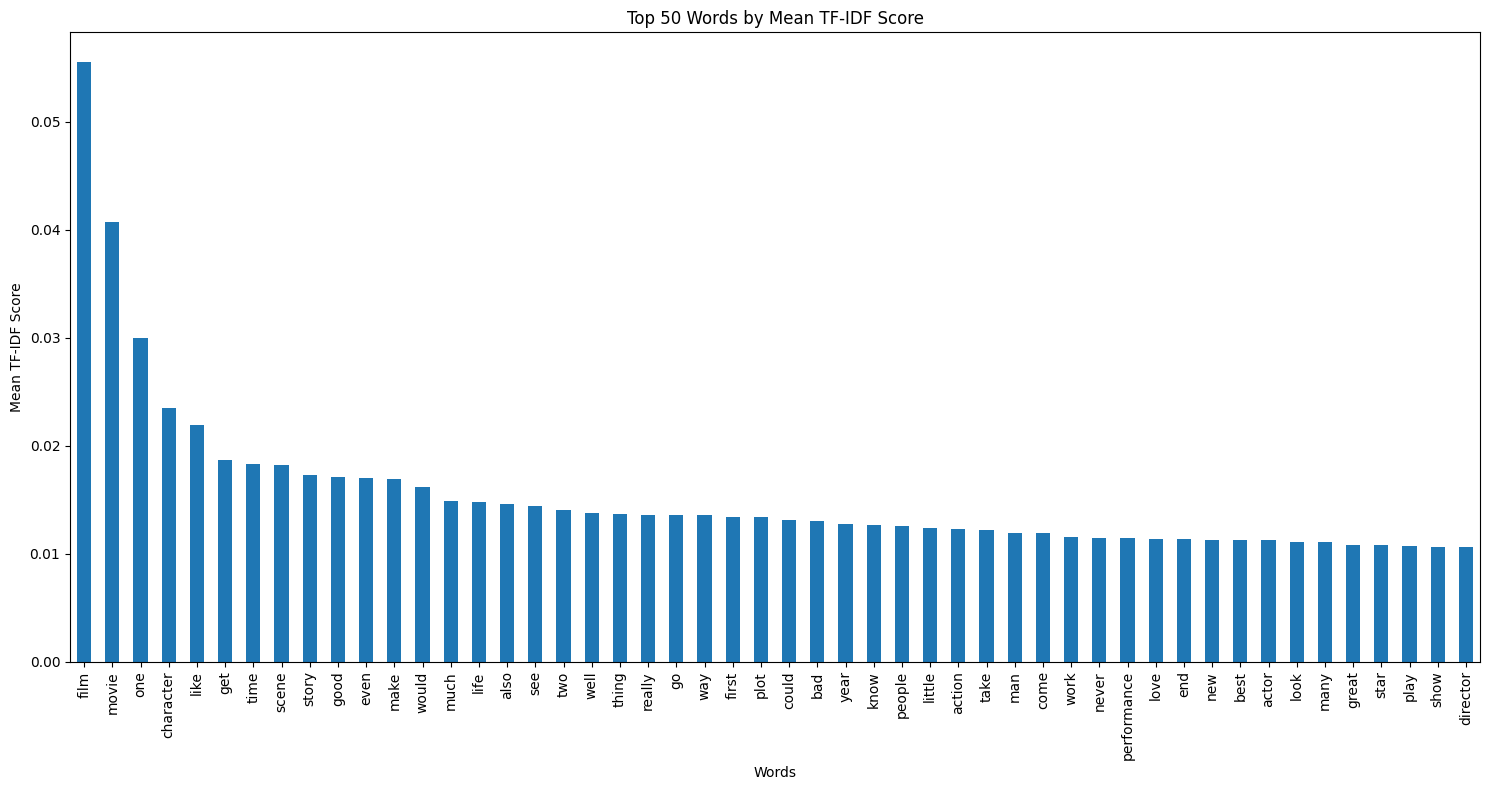

In [30]:
# Display the top 50 words
print("\nTop 50 words by mean TF-IDF score:")
print(top_words.head(50))

# Visualize the top 50 words
plt.figure(figsize=(15, 8))
top_words.head(50).plot(kind='bar')
plt.title('Top 50 Words by Mean TF-IDF Score')
plt.xlabel('Words')
plt.ylabel('Mean TF-IDF Score')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

What are some words that rank high in terms of TF-IDF score but not in terms of frequency?

In [32]:
# find words that rank high in terms of TF-IDF score but not in terms of frequency
# Calculate word frequencies
#word_freq = df['Processed_Review'].str.split(expand=True).stack().value_counts()

# Normalize word frequencies
word_freq_normalized = word_freq / word_freq.sum()

# Calculate the rank difference between TF-IDF and frequency
rank_diff = pd.DataFrame({
    'tfidf_rank': top_words.rank(ascending=False),
    'freq_rank': word_freq_normalized.rank(ascending=False)
})
rank_diff['rank_difference'] = rank_diff['freq_rank'] - rank_diff['tfidf_rank']

# Sort by rank difference to find words with high TF-IDF rank but low frequency rank
interesting_words = rank_diff.sort_values('rank_difference', ascending=False)

print("Top 50 words with high TF-IDF score but low frequency:")
print(interesting_words.head(50))


Top 50 words with high TF-IDF score but low frequency:
               tfidf_rank  freq_rank  rank_difference
youre             15531.5    27807.0          12275.5
wincer            15531.5    27807.0          12275.5
kolya             15660.5    27807.0          12146.5
zdenek            15660.5    27807.0          12146.5
kale              15755.0    27807.0          12052.0
sooo              15775.5    27807.0          12031.5
watchabe          15775.5    27807.0          12031.5
extremly          16202.5    27807.0          11604.5
fledged           16202.5    27807.0          11604.5
pallbearer        16234.0    27807.0          11573.0
mace              16341.0    27807.0          11466.0
fruitition        16530.0    27807.0          11277.0
cairo             16573.0    27807.0          11234.0
snoozing          16573.0    27807.0          11234.0
manhatten         16573.0    27807.0          11234.0
outshining        16581.5    27807.0          11225.5
conning           16581.5  

#### Visualizing the Data

Let's visualize the most important words in the corpus.

##### Word Cloud

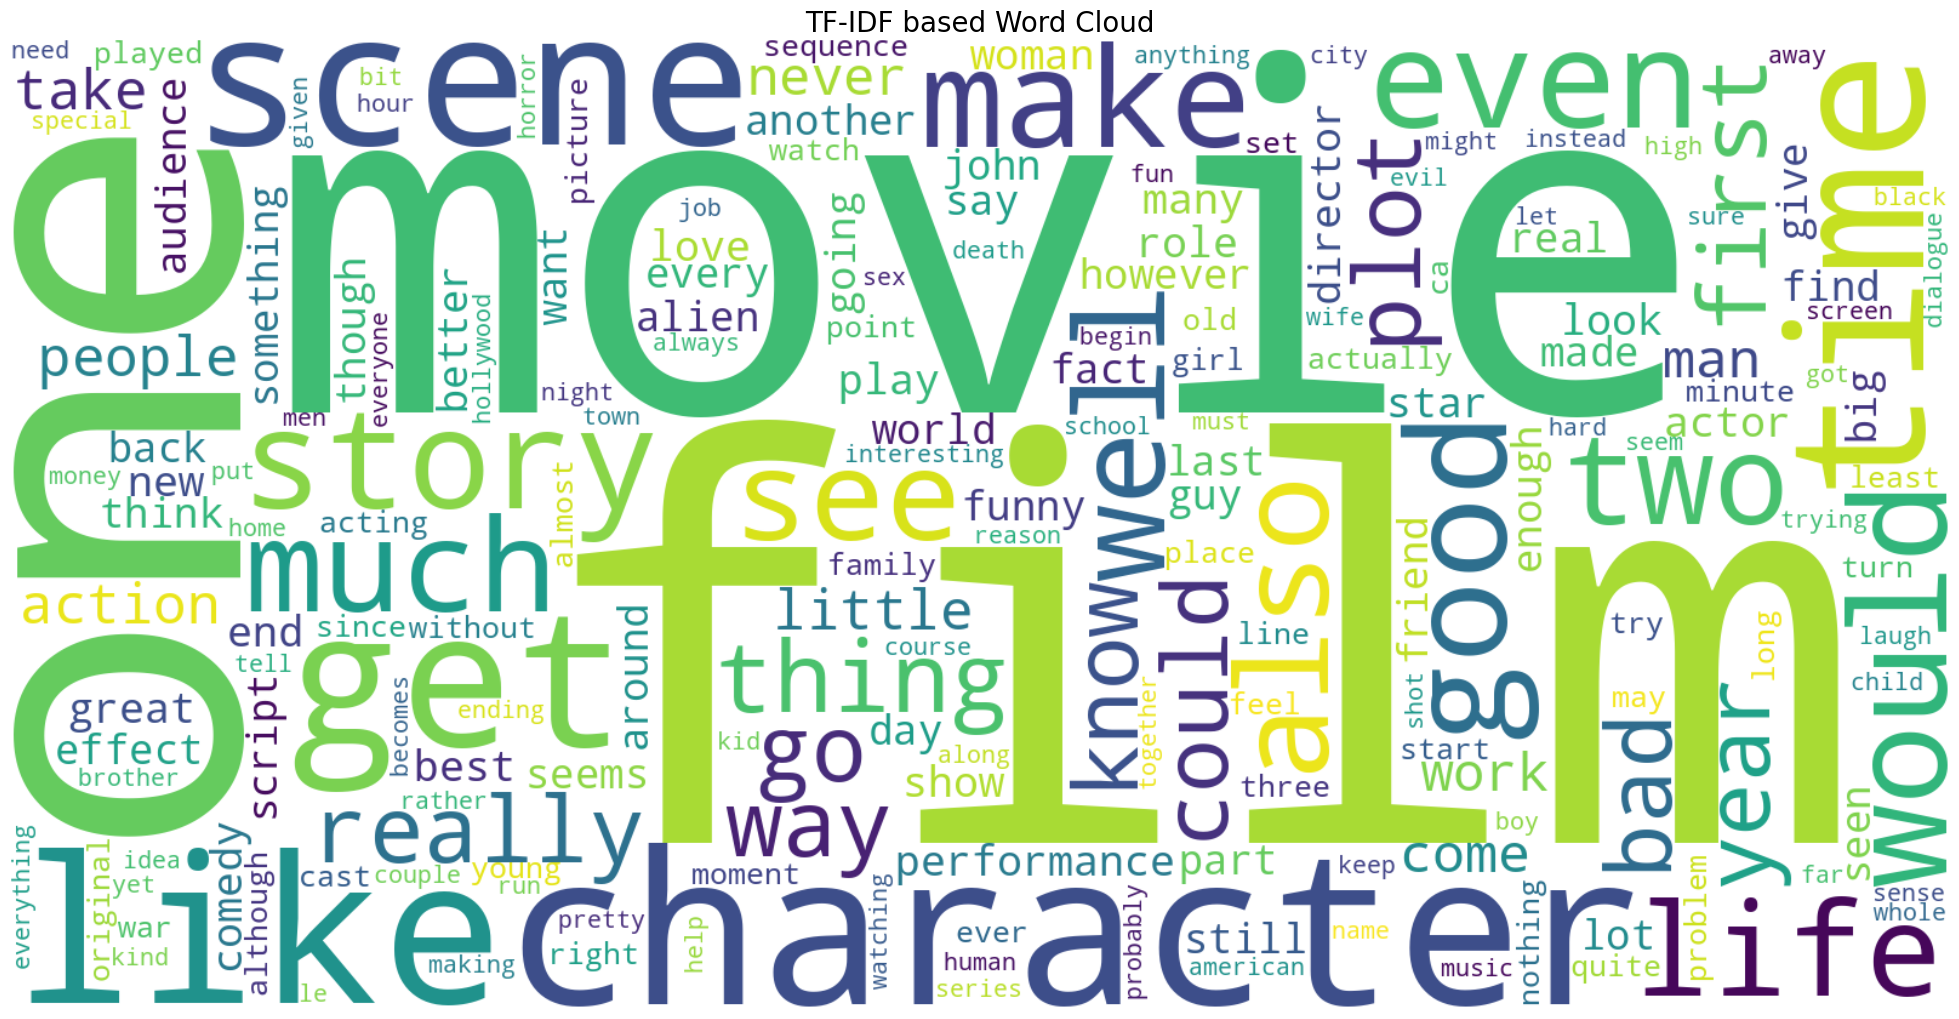

In [33]:
from wordcloud import WordCloud

# Use the existing TF-IDF data
tfidf_dict = top_words.to_dict()

# Generate TF-IDF based word cloud
tfidf_wordcloud = WordCloud(width=1600, height=800, background_color='white').generate_from_frequencies(tfidf_dict)

# Create the plot
plt.figure(figsize=(20, 10))
plt.imshow(tfidf_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('TF-IDF based Word Cloud', fontsize=20)
plt.tight_layout(pad=0)
plt.show()

For more complex feature representation methods that are able to provide a measure of meaning, based on the *distrubutional hypothesis* that the context in which words are used provides a clue to the meaning, we can use **Word Embeddings** which represents words in continuous vector space (e.g., Word2Vec, GloVe). Check out the GRS book for more details!

---

## Discovery

### Overview

When analyzing text data, we often have to reconsider the standard deductive approach social scientists have been trained to develop and test theories/claims. In fact, social scientists have acknowledged the importance of more inductive reasoning in the research process. With text data especially, a great deal of learning can happen *while* analyzing the data. 

<figure>
  <img src="https://github.com/jyang32/TAD_workshop/raw/june0919/plot/inductive_model.png" alt="Deductive versus Inductive Models" width="500"/>
  <figcaption>
    <small>Source: Grimmer, J., Roberts, M. E., & Stewart, B. M. (2022). Text as data: A new framework for machine learning and the social sciences. Princeton University Press. Page 15.</small>
  </figcaption>
</figure>

At the early stage of the research process, analysts are focused on *discovery*. The primary goal of discovery is to develop the research question. Discovery ofen involves using both supervised and unsupervised learning techniques to group texts into structures, patterns, or themes. 

*What is the different between supervised and unsupervised methods?*

Before we dive into the methods, let's briefly review the principles of discovery.

- **Principle 1**: Context Relevance
- **Principle 2**: No Ground Truth
- **Principle 3**: Judge the Concept, not the Method
- **Principle 4**: Separate Data is Best

Key Classes of Methods:

- **Discriminating Words**: Identifying words that are used disproportionally by a given group of documents.
- **Clustering**: producing a *partition* of the texts.
- **Topic Models**: discovering a set of *K* categories where documents hold proportional membership in all categories.
- **Low-Dimensional Document Embeddings**: locating documents in a real-valued space of lower dimensionality.

---
In this tutorial, we will focus on the method of Topic Modeling and the extensions of this method. 

###  Topic Modeling

Topic models suppose that each document in the corpus is a mixture of a fixed number of underlying topics, and each topic is a mixture of words. 

The goal of topic modeling is to identify the topics and their associated probabilities for each document, as well as the words and their associated probabilities for each topic.

In this tutorial, we'll use the canonical Latent Dirichlet Allocation (LDA) for topic modeling. 

LDA is a Bayesian hierarchical model that assumes a particular data generation process for how an author produces a text. We first suppose that when writing a text, the author draws a mixure of topics: a set of weights that will describe how prevalent the particular topics are. Given that set of weights, the author generates the actual text. For each word the author first draws the word' topic. Then, conditional on the topic, the actual word is drawn from a topic-specific distribution. This topic-specific distribution is common across the documents and characterizes the rates at which words appear when discussing a particular topic. Mathematically, we can describe the process as follows:

##### Latent Dirichlet Allocation (LDA) Model

As a generative probabilistic model for collections of discrete data such as text corpora, the LDA model assumes the following generative process for each document $d$ in a corpus $D$:

1. Choose $\theta_d \sim \text{Dirichlet}(\alpha)$, where $\theta_d$ is the topic distribution for document $d$.
2. For each word $w_{d,n}$ in document $d$:
   a. Choose a topic $z_{d,n} \sim \text{Multinomial}(\theta_d)$
   b. Choose a word $w_{d,n} \sim \text{Multinomial}(\beta_{z_{d,n}})$

##### Parameters:

- $K$: Number of topics
- $V$: Vocabulary size
- $M$: Number of documents
- $N_d$: Number of words in document $d$
- $\alpha$: Dirichlet prior on the per-document topic distributions
- $\beta$: Dirichlet prior on the per-topic word distribution

##### Distributions:

1. The distribution of topics in document $d$:
   $$P(\theta_d | \alpha) = \text{Dir}(\theta_d | \alpha)$$

2. The distribution of words in topic $k$:
   $$P(\beta_k | \eta) = \text{Dir}(\beta_k | \eta)$$

3. The topic assignment for word $n$ in document $d$:
   $$P(z_{d,n} | \theta_d) = \text{Multinomial}(z_{d,n} | \theta_d)$$

4. The observed word $n$ in document $d$:
   $$P(w_{d,n} | z_{d,n}, \beta) = \text{Multinomial}(w_{d,n} | \beta_{z_{d,n}})$$

##### Joint Distribution:

The joint distribution of all random variables is:

$$P(\theta, z, w | \alpha, \beta) = \prod_{d=1}^M P(\theta_d | \alpha) \prod_{n=1}^{N_d} P(z_{d,n} | \theta_d) P(w_{d,n} | z_{d,n}, \beta)$$

##### Inference:

The goal is to compute the posterior distribution:

$$P(\theta, z | w, \alpha, \beta) = \frac{P(\theta, z, w | \alpha, \beta)}{P(w | \alpha, \beta)}$$

This is typically approximated using methods like Variational Inference or Gibbs Sampling.

---

### How to perform LDA analysis using Python?

We'll perform LDA analysis mainly using the `sklearn` library.

##### Import Libraries

In [34]:
# Scikit-learn libraries
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics import silhouette_score

#### Loading and Preprocessing Data

We'll use the preprocessed data from the previous section.

In [35]:
# movie_reviews data from the previous section
df.head()

,Review,Label,Processed_Review
0,"plot : two teen couples go to a church party ,...",neg,plot two teen couple go church party drink dri...
1,the happy bastard's quick movie review \ndamn ...,neg,happy bastard quick movie review damn bug got ...
2,it is movies like these that make a jaded movi...,neg,movie like make jaded movie viewer thankful in...
3,""" quest for camelot "" is warner bros . ' firs...",neg,quest camelot warner bros first attempt steal ...
4,synopsis : a mentally unstable man undergoing ...,neg,synopsis mentally unstable man undergoing psyc...


##### Vectorize the Text Data

LDA does not work with raw text. Just as we learned in the previous section, we need to convert the text data into a numerical feature matrix. Here, we will use the TF-IDF method. `Scikit-learn`'s `TfidfVectorizer` provides a convenient way for us to not only convert single words, but also generate n-grams and calculate the TF-IDF scores.

**N-grams** are continuous sequences of words or tokens. For example:

- **Unigrams (n=1)**: A single word (e.g., "movie");
- **Bigrams (n=2)**: A sequence of two words (e.g., "great movie");
- **Trigrams (n=3)**: A sequence of three words (e.g., "really great movie");

Using a range of n-grams (from 1 to 5 in the below code) helps us capture not only individual words, but also common phrases and expressions in the text.  

In [37]:
# Import TfidfVectorizer
# from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer with n-grams from 1 to 5
# max_df: ignore terms that appear in more than 95% of the documents
# min_df: ignore terms that appear in less than 2 documents
# stop_words: ignore common English stop words
# ngram_range: consider n-grams from 1 to 5
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english', ngram_range=(1, 5))

# Fit and transform the 'Processed_Review' column
X = vectorizer.fit_transform(df['Processed_Review'])

# Check the shape of the resulting document-term matrix
print(f"Shape of the document-term matrix: {X.shape}")

Shape of the document-term matrix: (1998, 84012)


##### Apply LDA

In [39]:
# Set the number of topics
n_topics = 5

# Initialize the LDA model
lda_model = LatentDirichletAllocation(n_components=n_topics, random_state=42)

# Fit the LDA model to the TF-IDF matrix
lda_model.fit(X)

LatentDirichletAllocation(n_components=5, random_state=42)

##### Examine the Topics

Now let's display the top n-grams for each topic. 

In [40]:
# Get the n-grams (words and phrases) that make up the vocabulary
ngrams = vectorizer.get_feature_names_out()

# Function to display the top n-grams for each topic
def display_topics(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"\nTopic {topic_idx + 1}:")
        print(", ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

# Display the top 10 n-grams for each topic
n_top_words = 10
display_topics(lda_model, ngrams, n_top_words)


Topic 1:
know react, col, col nicholson, francie, event horizon, horizon, know react michael jordan, chase long know, michael jordan winning nba, know react michael jordan winning

Topic 2:
film, movie, character, like, scene, time, story, make, good, life

Topic 3:
friend amazing potent stuff perfection, creaky better staying, stuff perfection twice, little creaky better staying, pretty good bring, pretty good bring friend, good bring friend, potent stuff perfection twice, stuff perfection, home gotcha

Topic 4:
chicken, chicken run, funnest, tweedy, mr tweedy, wrong trouser, close shave, gibson rocky, sawalha, chicken pie

Topic 5:
musketeer, gal, sexy beast, respectability, kingsley, febre, richelieu, duma, nick moran athos jan, nick moran athos


For each topic, we can also sort the documents by their probabilities of belonging to the topic, and then select the top documents that have the highest probabilities of belonging to the topic. 

In [41]:
# Get the topic distribution for each document
doc_topic_distributions = lda_model.transform(X)

# Show the shape of the topic distribution matrix (documents x topics)
print(doc_topic_distributions.shape)

# Each row corresponds to a document, and each column corresponds to a topic.
# For example, doc_topic_distributions[0] gives the topic distribution for the first document.

(1998, 5)


In [42]:
# Set a threshold for topic contribution
threshold = 0.1

# Step 2: For each topic, find the top documents
n_top_docs = 2  # Number of top documents per topic
for topic_idx in range(n_topics):
    print(f"\nTopic {topic_idx + 1}:")
    
    # Find the documents where the contribution to this topic is greater than the threshold
    significant_docs = np.where(doc_topic_distributions[:, topic_idx] > threshold)[0]
    
    if len(significant_docs) == 0:
        print("No documents were assigned to this topic.")
        continue

    # Sort the documents by their topic contribution
    topic_contributions = doc_topic_distributions[significant_docs, topic_idx]
    
    # Use np.unique to ensure that the top documents are unique
    unique_top_doc_indices = np.unique(significant_docs[np.argsort(topic_contributions)[::-1][:n_top_docs]])
    
    # Display the top documents for this topic, ensuring no duplicates
    for doc_idx in unique_top_doc_indices:
        print(f"Document {doc_idx}: (Topic {topic_idx + 1} weight: {doc_topic_distributions[doc_idx, topic_idx]:.4f})")
        print(df['Processed_Review'].iloc[doc_idx][:500])  # Show the first 500 characters of the review
        print("-" * 80)


Topic 1:
Document 1172: (Topic 1 weight: 0.8470)
bad film fact good achieving purpose actually wished film end quickly event horizon film sure many watched agree even original sense borrow heavily film like alien hellraiser even blade runner magic film lie unorthodox setting methodical make wonderfully horrifying story brings u year space travel since enormously progressed event horizon actually ship built secret experimental purpose ability fold time space thus making possible travelling distance reachable man lifetime ship disappeared soon w
--------------------------------------------------------------------------------
Document 1757: (Topic 1 weight: 0.8478)
bad film fact good achieving purpose actually wished film end quickly event horizon film sure many watched agree even original sense borrow heavily film like alien hellraiser even blade runner magic film lie unorthodox setting methodical make wonderfully horrifying story brings u year space travel since enormously progressed e

In [44]:
# Examine documents 1174 and 1759 in df
print("Document 1172:")
print(df['Processed_Review'].iloc[1172])
print("\nOriginal Review:")
print(df['Review'].iloc[1172])
print("\n" + "-"*80 + "\n")

print("Document 1757:")
print(df['Processed_Review'].iloc[1757])
print("\nOriginal Review:")
print(df['Review'].iloc[1757])


Document 1172:
bad film fact good achieving purpose actually wished film end quickly event horizon film sure many watched agree even original sense borrow heavily film like alien hellraiser even blade runner magic film lie unorthodox setting methodical make wonderfully horrifying story brings u year space travel since enormously progressed event horizon actually ship built secret experimental purpose ability fold time space thus making possible travelling distance reachable man lifetime ship disappeared soon went operation year reappeared within orbit neptune search rescue team led miller fishburne given task check survivor event horizon designer ship dr weir neill follows along satisfy curiosity actually happened otherwise technologically impressive ship event horizon horror film much truer word say alien would ever alien crew cope ferocious creature encased within tight space event horizon force go crew undefined yet powerful horrifying story unfolds slowly suspense buildup superb ti

##### Optimal Number of Topics

Choosing the optimal number of topics is one of the key challenges in topic modeling. We can use the following methods to choose the optimal number of topics:

- **Perplexity**: A measure of how well the model predicts the held-out data. Lower perplexity indicates a better fit.
- **Coherence Score**: A measure of the semantic similarity between the top words in the topics. Higher coherence scores indicate better topic quality.
- **Manual Interpretation**: Sometimes manual inspection of topics and their interpretability is necessary. If topics are too similar or too granular, you may want to adjust the number of topics.
- **Grid Search/Cross Validation**: Usea range of topic numbers and evaluate using the above metrics to find the most appropriate number. 

While **perplexity** can give us a quantitative measure of how well the model fits the data, it doesn't always correlate with how meaningful the topics are to humans. That's why **coherence** is often preferred for assessing topic models. In Python, we can use the `gensim` library's `CoherenceModel` to calculate the coherence score for different number of topics, and then chooses the one with the highest coherence score. 

### Incorporating Structure into LDA

- Structure with upstream, known prevalence covariates
- Structure with downstream, known content covariates
- Structural Topic Models
- Structure with downstream, know covariates

Probablistic topic models such as LDA and STM are readily implemented by R packages. 

---

## Measurement

### Overview

**Measurement** involves quantifying specific attributes or behaviors within text data. The beauty of text as data is that we can create custom measurements for a wide range of phenomena that are often difficult to quantify based on other data types. Before we dive into the specifics, let's review the key principles and classes of methods that can be used for measurement building. 

Key principles: *What makes a good measurement?*

- **Principle 1**: Measures should have clear goals
- **Principle 2**: Source material should always be identified and ideally made public
- **Principle 3**: The coding process should be explainable and reproducible
- **Principle 4**: The measure should be validated
- **Principle 5**: Limitations should be explored, documentd and communicated to the audience

Key varieties of approaches:

- **Word Counting** (keyword- or dictionary-based methods)
- **Supervised Classification**
- **Generative Large Language Models**

With qualitative methods, we can create custom measurements of text data by coding the text data ourselves. This process can be time and resource-consuming, but it allows for the creation of highly specific and tailored measures. Coding qualitatively often creates "ground truth" that can be used to validate more automated approaches. 

Supervised classification uses a set of documents labeled into categories to create a statistical model, also referred to as a classifier that relates the words in the documents to the labels. A properly trained classifier can be used to classify new, unseen text data. 

---
### How to Train a Supervised Classifier using Python?
In the example below, we'll use the same data from the previous section, and the `scikit-learn` library to train a logistic regression classifier for movie review sentiment analysis. 

#### Import Libraries and prepare data



In [48]:
# Training a Classifier for Movie Review Sentiment Analysis with Imputation

#import pandas as pd
#import numpy as np
#from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
#import matplotlib.pyplot as plt

## Step 1: Data Preparation and Artificial Missingness

print("Step 1: Data Preparation and Artificial Missingness")

# Assuming df is your DataFrame with 'Processed_Review' and 'Label' columns
print(f"Original dataset shape: {df.shape}")

# Create a binary label column
df['Label_Binary'] = df['Label'].map({'pos': 1, 'neg': 0})

# Introduce random missingness (20% of the data)
np.random.seed(42)
miss_mask = np.random.rand(len(df)) < 0.2
df.loc[miss_mask, 'Label_Binary'] = np.nan

print(f"Number of reviews with missing labels: {sum(df['Label_Binary'].isna())}")


Step 1: Data Preparation and Artificial Missingness
Original dataset shape: (1998, 4)
Number of reviews with missing labels: 427


In [52]:
## Step 2: Split Data into Training and Testing Sets

print("\nStep 2: Split Data")

# Separate labeled and unlabeled data
labeled_mask = ~df['Label_Binary'].isna()
X_labeled = df.loc[labeled_mask, 'Processed_Review']
y_labeled = df.loc[labeled_mask, 'Label_Binary']
X_unlabeled = df.loc[~labeled_mask, 'Processed_Review']

X_train, X_test, y_train, y_test = train_test_split(X_labeled, y_labeled, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")
print(f"Unlabeled set shape: {X_unlabeled.shape}")

## Step 3: Feature Extraction with N-grams

print("\nStep 3: Feature Extraction with N-grams")

# Initialize and fit the TF-IDF vectorizer on training data only
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=1000, max_df=0.9, min_df=5)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
X_unlabeled_tfidf = tfidf_vectorizer.transform(X_unlabeled)

print(f"Shape of training feature matrix: {X_train_tfidf.shape}")
print(f"Shape of testing feature matrix: {X_test_tfidf.shape}")
print(f"Shape of unlabeled feature matrix: {X_unlabeled_tfidf.shape}")

# Display some of the n-gram features
feature_names = tfidf_vectorizer.get_feature_names_out()
print("\nSample n-gram features:")
print(feature_names[:10])  # First 10 features
print(feature_names[-10:])  # Last 10 features

## Step 4: Train the Classifier

print("\nStep 4: Train the Classifier")

# Initialize and train the classifier
classifier = LogisticRegression(random_state=24, max_iter=1000)
classifier.fit(X_train_tfidf, y_train)

# Evaluate on the test set
y_pred = classifier.predict(X_test_tfidf)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))


Step 2: Split Data
Training set shape: (1256,)
Testing set shape: (315,)
Unlabeled set shape: (427,)

Step 3: Feature Extraction with N-grams
Shape of training feature matrix: (1256, 1000)
Shape of testing feature matrix: (315, 1000)
Shape of unlabeled feature matrix: (427, 1000)

Sample n-gram features:
['ability' 'able' 'absolutely' 'accent' 'accident' 'across' 'act' 'acting'
 'action' 'action film']
['writer' 'writing' 'written' 'wrong' 'wrote' 'year' 'yes' 'yet' 'york'
 'young']

Step 4: Train the Classifier

Classification Report:
              precision    recall  f1-score   support

    Negative       0.84      0.77      0.80       155
    Positive       0.79      0.86      0.83       160

    accuracy                           0.82       315
   macro avg       0.82      0.82      0.82       315
weighted avg       0.82      0.82      0.82       315



In [54]:
# Display top features
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance (log-odds)': classifier.coef_[0]
})
print("\nTop 10 positive features:")
print(feature_importance.sort_values('importance (log-odds)', ascending=False).head(10))
print("\nTop 10 negative features:")
print(feature_importance.sort_values('importance (log-odds)', ascending=True).head(10))


Top 10 positive features:
         feature  importance (log-odds)
496         life               1.993881
958         well               1.616749
950          war               1.562208
633  performance               1.396562
28          also               1.344255
444       jackie               1.320444
380        great               1.314727
291    excellent               1.302826
527         many               1.283305
631      perfect               1.270454

Top 10 negative features:
           feature  importance (log-odds)
68             bad              -3.349963
987          worst              -2.304939
280           even              -1.588485
652           plot              -1.587337
837         stupid              -1.559737
595        nothing              -1.514645
64           awful              -1.417972
103         boring              -1.406790
847       supposed              -1.382117
923  unfortunately              -1.369852



Step 5: Impute Missing Labels
Sample of imputed labels:
                                     Processed_Review  Imputed_Label
4   synopsis mentally unstable man undergoing psyc...            0.0
5   capsule planet mar police taking custody accus...            1.0
6   ask eight millimeter really wholesome surveill...            0.0
10  best remembered understated performance dr han...            1.0
14  femme la femme nikita baldwin backdraft sliver...            0.0

Final dataset shape: (1998, 6)
Number of positive reviews: 1015
Number of negative reviews: 983

Step 6: Analyze Results


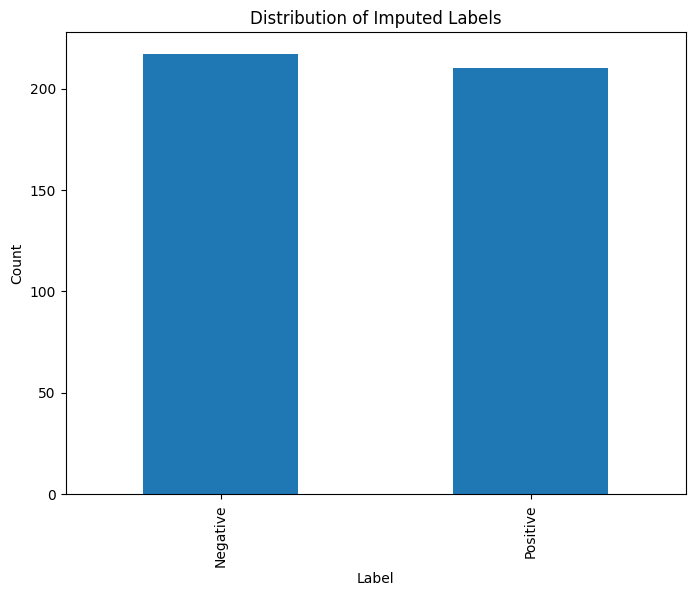


Example Reviews with Imputed Labels:
Review: luckily people got starship trooper people knew supposed silly could miss beginning see interactive ...
Imputed Label: Positive
Original Label: pos

Review: magnolia left relling theatre staggering relentless assault adventurous director reveling craft near...
Imputed Label: Positive
Original Label: pos

Review: steve martin one funniest men alive take true statement disappointment film equal mine martin hilari...
Imputed Label: Positive
Original Label: neg

Review: film critic moral unwritten law ethical movie critic would follow naturally want go film preconceive...
Imputed Label: Positive
Original Label: pos

Review: back february monthly los angeles comic book science fiction convention new line cinema put lavish p...
Imputed Label: Negative
Original Label: neg


Step 7: Compare Imputed Labels with Original Labels
Accuracy of imputed labels: 0.79

Classification Report for Imputed Labels:
              precision    recall  f1-score   su

In [64]:
## Step 5: Impute Missing Labels

print("\nStep 5: Impute Missing Labels")

# Predict labels for unlabeled data
imputed_labels = classifier.predict(X_unlabeled_tfidf)

# Add imputed labels to the dataframe
df.loc[~labeled_mask, 'Imputed_Label'] = imputed_labels
df['Final_Label'] = df['Label_Binary'].fillna(df['Imputed_Label'])

print("Sample of imputed labels:")
print(df[~labeled_mask][['Processed_Review', 'Imputed_Label']].head())

print(f"\nFinal dataset shape: {df.shape}")
print(f"Number of positive reviews: {sum(df['Final_Label'] == 1)}")
print(f"Number of negative reviews: {sum(df['Final_Label'] == 0)}")

## Step 6: Analyze Results

print("\nStep 6: Analyze Results")

# Plot distribution of imputed labels
plt.figure(figsize=(8, 6))
df.loc[~labeled_mask, 'Imputed_Label'].value_counts().plot(kind='bar')
plt.title('Distribution of Imputed Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.show()

# Print some example reviews with their imputed labels
print("\nExample Reviews with Imputed Labels:")
for _, row in df[~labeled_mask].sample(5).iterrows():
    print(f"Review: {row['Processed_Review'][:100]}...")
    print(f"Imputed Label: {'Positive' if row['Imputed_Label'] == 1 else 'Negative'}")
    print(f"Original Label: {row['Label']}")
    print()

## Step 7: Compare Imputed Labels with Original Labels

print("\nStep 7: Compare Imputed Labels with Original Labels")

# For the artificially missing labels, compare imputed with original
comparison_mask = ~labeled_mask
original_labels = df.loc[comparison_mask, 'Label'].map({'pos': 1, 'neg': 0})
imputed_labels = df.loc[comparison_mask, 'Imputed_Label']

imputation_accuracy = accuracy_score(original_labels, imputed_labels)
print(f"Accuracy of imputed labels: {imputation_accuracy:.2f}")

print("\nClassification Report for Imputed Labels:")
print(classification_report(original_labels, imputed_labels, target_names=['Negative', 'Positive']))

##### Measurement using Neural Networks based Models

**Neural Networks based Models**: Models like BERT and GPT-4o are leveraging neural networks to improve text data analysis.
 
 **BERT**: BERT(Bidirectional Encoder Representations from Transformers) is a type of neural network model used for natural language processing tasks. It was introduced by Google in 2018 and has since become one of the most popular models for language understanding tasks.

BERT is a transformer-based model, which means it uses self-attention mechanisms to process the input data. It is bidirectional, meaning it considers both the left and right context of a word when making predictions. This is in contrast to many previous models that only considered one direction (either left or right).

The key idea behind BERT is that it can be pre-trained on a large corpus of text and then fine-tuned for specific tasks. This pre-training involves predicting missing words in a sentence (called "masked language modeling") and predicting the next sentence in a given pair (called "next sentence prediction").

Once pre-trained, BERT can be used for a variety of tasks such as language modeling, text classification, and question answering. It has been shown to achieve state-of-the-art results on many benchmarks and has been used in a wide range of applications, including search, chatbots, and content recommendation systems.

 **GPT-4o**: GPT-4o is a large language model developed by OpenAI. It is a successor to the GPT-4 model and is designed to be more efficient and powerful. GPT-4o is based on the GPT architecture, which uses a transformer-based neural network model.

GPT-4o is designed to be a general-purpose language model that can understand and generate human-like text in a wide range of languages and domains. It is pre-trained on a massive corpus of text data and has been fine-tuned for a variety of tasks, including language modeling, text classification, and question answering.

One of the key features of GPT-4o is its ability to generate highly realistic and context-sensitive text. It can be used for a wide range of applications, including content creation, data analysis, and natural language processing tasks.

GPT-4o is a powerful tool for language understanding and generation, and it has been used in a wide range of applications, including search, chatbots, and content recommendation systems.

---

## References

- **APIs and Data Retrieval**:
  - [NewsAPI Documentation](https://newsapi.org/docs)
  - [Reddit API Documentation](https://www.reddit.com/dev/api/)
  - [Requests Library Documentation](https://requests.readthedocs.io/en/latest/)

- **Books**:
  - *Mining the Social Web* by Matthew A. Russell

- **Online Tutorials**:
  - [Sentiment Analysis of Movie Reviews in NLTK python](https://medium.com/@joel_34096/sentiment-analysis-of-movie-reviews-in-nltk-python-4af4b76a6f3)
  - [Real Python - APIs and Web Scraping](https://realpython.com/api-integration-in-python/)
  - [DataCamp - Working with APIs](https://www.datacamp.com/community/tutorials/using-apis-in-python)

- **Datasets**:
  - [Kaggle Datasets](https://www.kaggle.com/datasets)
  - [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php)

---

*End of Tutorial*